In [1]:
import sys
import sklearn
import tensorflow as tf
from tensorflow import keras

%load_ext tensorboard

import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt

# The Vanishing/Exploding Gradients Problems

In [2]:
def logit(z):
    return 1/(1 + np.exp(-z))

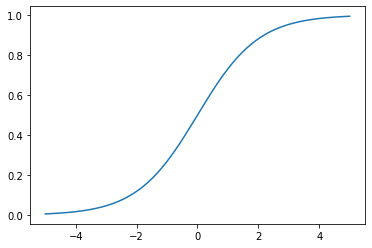

In [3]:
z= np.linspace(-5,5,200)

plt.plot(z, logit(z))

入力が大きくなると関数は０か1にサチり微分は限りなく0になる。その結果逆伝播が伝わらなくなる。

## Glorot(Xavier) and He Initialization

In [4]:
[name for name in dir(keras.initializers) if not name.startswith('_')]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'truncated_normal',
 'variance_scaling',
 'zeros']

kerasはデフォルトで一様分布のGlorotの初期化を使う。  
Glorotはtanhやsigmoid、softmax向き。  
HeはReLU向き。次のようにしてHeの初期化を使う。

In [5]:
keras.layers.Dense(10, activation='relu', kernel_initializer='he_normal')

Heの初期化で$fan_{in}$ではなく$fan_{avg}$を使いたい場合、次の[VarianceScaling](https://www.tensorflow.org/api_docs/python/tf/keras/initializers/VarianceScaling)を使う。

In [6]:
he_avg_init =keras.initializers.VarianceScaling(scale=2., mode='fan_avg',
                                         distribution='uniform')
keras.layers.Dense(10,activation ='relu', kernel_initializer=he_avg_init)

## Nonsaturating Activation Functions

### Leaky ReLU

In [7]:
def leaky_relu(z, alpha =0.01):
    return np.maximum(alpha*z, z)


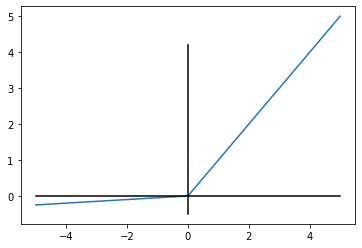

In [8]:
plt.plot(z, leaky_relu(z, 0.05))
plt.plot([-5,5],[0,0],'k-')
plt.plot([0,0],[-0.5,4.2],'k-')


In [9]:
[m for m in dir(keras.activations) if not m.startswith('_')]

['deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

In [10]:
[m for m in dir(keras.layers) if 'relu' in m.lower()]

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

In [11]:
(X_train_full, y_train_full), (X_test,y_test)=keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full/255.0
X_test = X_test/255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]


In [12]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, kernel_initializer='he_normal'),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer='he_normal'),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation='softmax'),
])

2022-09-21 04:47:53.651473: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-21 04:47:53.700314: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-21 04:47:53.700440: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-21 04:47:53.700900: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [13]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['accuracy'])

In [14]:
history=model.fit(X_train, y_train, epochs=10,
                  validation_data=(X_valid, y_valid))

Epoch 1/10
 156/1719 [=>............................] - ETA: 1s - loss: 2.0883 - accuracy: 0.2752

2022-09-21 04:47:55.612598: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1719/1719 [==============================] - 3s 1ms/step - loss: 1.2819 - accuracy: 0.6229 - val_loss: 0.8886 - val_accuracy: 0.7160
Epoch 2/10
1719/1719 [==============================] - 2s 967us/step - loss: 0.7955 - accuracy: 0.7361 - val_loss: 0.7130 - val_accuracy: 0.7656
Epoch 3/10
1719/1719 [==============================] - 2s 978us/step - loss: 0.6816 - accuracy: 0.7721 - val_loss: 0.6427 - val_accuracy: 0.7900
Epoch 4/10
1719/1719 [==============================] - 2s 960us/step - loss: 0.6217 - accuracy: 0.7944 - val_loss: 0.5900 - val_accuracy: 0.8064
Epoch 5/10
1719/1719 [==============================] - 2s 966us/step - loss: 0.5832 - accuracy: 0.8074 - val_loss: 0.5582 - val_accuracy: 0.8202
Epoch 6/10
1719/1719 [==============================] - 2s 997us/step - loss: 0.5553 - accuracy: 0.8157 - val_loss: 0.5350 - val_accuracy: 0.8238
Epoch 7/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5339 - accuracy: 0.8224 - val_loss: 0.5157 - val_accuracy: 

In [15]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, kernel_initializer='he_normal'),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer='he_normal'),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation='softmax'),
])

In [16]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['accuracy'])

In [17]:
history=model.fit(X_train, y_train, epochs=10,
                  validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 2s 1ms/step - loss: 1.3461 - accuracy: 0.6209 - val_loss: 0.9254 - val_accuracy: 0.7186
Epoch 2/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.8197 - accuracy: 0.7355 - val_loss: 0.7306 - val_accuracy: 0.7630
Epoch 3/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.6966 - accuracy: 0.7694 - val_loss: 0.6565 - val_accuracy: 0.7878
Epoch 4/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.6331 - accuracy: 0.7911 - val_loss: 0.6004 - val_accuracy: 0.8046
Epoch 5/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5917 - accuracy: 0.8057 - val_loss: 0.5656 - val_accuracy: 0.8182
Epoch 6/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5618 - accuracy: 0.8137 - val_loss: 0.5407 - val_accuracy: 0.8240
Epoch 7/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5390 - accuracy: 0.8207 - val_loss: 0.5197 - val_accuracy:

### ELU

In [18]:
def elu(z, alpha=1):
    return np.where(z<0, alpha*(np.exp(z)-1),z)

(-5.0, 5.0, -2.2, 3.2)

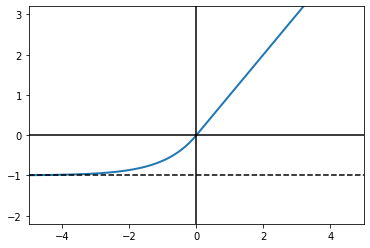

In [19]:
plt.plot(z, elu(z), linewidth = 2)
plt.plot([-5,5],[0,0], 'k-')
plt.plot([-5,5],[-1,-1], 'k--')
plt.plot([0,0],[-2.2,3.2], 'k-')
plt.axis([-5,5,-2.2, 3.2])

In [20]:
keras.layers.Dense(10,activation='elu')

### SELU

In [21]:
from scipy.special import erfc

alpha_0_1=-np.sqrt(2/np.pi)/(erfc(1/np.sqrt(2))*np.exp(1/2)-1)
scale_0_1 = (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e)) * np.sqrt(2 * np.pi) * (2 * erfc(np.sqrt(2))*np.e**2 + np.pi*erfc(1/np.sqrt(2))**2*np.e - 2*(2+np.pi)*erfc(1/np.sqrt(2))*np.sqrt(np.e)+np.pi+2)**(-1/2)

In [22]:
def selu(z, scale = scale_0_1, alpha = alpha_0_1):
    return scale*elu(z, alpha)

(-5.0, 5.0, -2.2, 3.2)

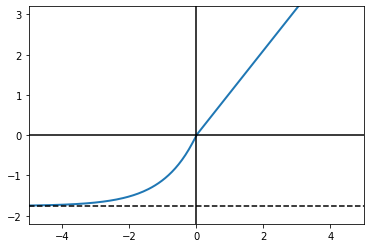

In [23]:
plt.plot(z, selu(z), linewidth =2)
plt.plot([-5,5],[0,0], 'k-')
plt.plot([-5,5],[-1.758,-1.758], 'k--')
plt.plot([0,0],[-2.2,3.2], 'k-')
plt.axis([-5,5,-2.2, 3.2])

In [24]:
np.random.seed(42)
Z=np.random.normal(size=(500,100))
for layer in range(1000):
    W = np.random.normal(size=(100,100), scale=np.sqrt(1/100))
    Z=selu(np.dot(Z,W))
    means=np.mean(Z, axis=0).mean()
    stds = np.std(Z, axis=0).mean()
    if layer %100==0:
        print('Layer {}:mean{:.2f}, std deviation {:.2f}'.format(layer, means, stds))

Layer 0:mean-0.00, std deviation 1.00
Layer 100:mean0.02, std deviation 0.96
Layer 200:mean0.01, std deviation 0.90
Layer 300:mean-0.02, std deviation 0.92
Layer 400:mean0.05, std deviation 0.89
Layer 500:mean0.01, std deviation 0.93
Layer 600:mean0.02, std deviation 0.92
Layer 700:mean-0.02, std deviation 0.90
Layer 800:mean0.05, std deviation 0.83
Layer 900:mean0.02, std deviation 1.00


In [25]:
keras.layers.Dense(10, activation='selu',kernel_initializer='lecun_normal')

In [26]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation = 'selu', kernel_initializer='lecun_normal'))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation = 'selu', kernel_initializer='lecun_normal'))
model.add(keras.layers.Dense(10, activation='softmax'))


In [27]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['accuracy'])

In [28]:
pixel_means=X_train.mean(axis=0, keepdims=True)
pixel_stds=X_train.std(axis=0, keepdims=True)
X_train_scaled=(X_train-pixel_means)/pixel_stds
X_valid_scaled=(X_valid-pixel_means)/pixel_stds
X_test_scaled=(X_test-pixel_means)/pixel_stds

In [29]:
history=model.fit(X_train_scaled, y_train, epochs=5,
                  validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 20s 11ms/step - loss: 1.5915 - accuracy: 0.3543 - val_loss: 1.4535 - val_accuracy: 0.3884
Epoch 2/5
1719/1719 [==============================] - 14s 8ms/step - loss: 1.2126 - accuracy: 0.5213 - val_loss: 0.8266 - val_accuracy: 0.6720
Epoch 3/5
1719/1719 [==============================] - 13s 7ms/step - loss: 0.7835 - accuracy: 0.7096 - val_loss: 0.7004 - val_accuracy: 0.7446
Epoch 4/5
1719/1719 [==============================] - 14s 8ms/step - loss: 0.6860 - accuracy: 0.7520 - val_loss: 0.6207 - val_accuracy: 0.7772
Epoch 5/5
1719/1719 [==============================] - 12s 7ms/step - loss: 0.6363 - accuracy: 0.7673 - val_loss: 0.5792 - val_accuracy: 0.7908


In [30]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation = 'relu', kernel_initializer='he_normal'))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation = 'relu', kernel_initializer='he_normal'))
model.add(keras.layers.Dense(10, activation='softmax'))


In [31]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['accuracy'])

In [32]:
history=model.fit(X_train_scaled, y_train, epochs=5,
                  validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 16s 9ms/step - loss: 1.8101 - accuracy: 0.2583 - val_loss: 1.3071 - val_accuracy: 0.4238
Epoch 2/5
1719/1719 [==============================] - 13s 8ms/step - loss: 1.2031 - accuracy: 0.4871 - val_loss: 1.2103 - val_accuracy: 0.5064
Epoch 3/5
1719/1719 [==============================] - 15s 9ms/step - loss: 0.9735 - accuracy: 0.5926 - val_loss: 1.0530 - val_accuracy: 0.5844
Epoch 4/5
1719/1719 [==============================] - 15s 9ms/step - loss: 0.8569 - accuracy: 0.6530 - val_loss: 1.7963 - val_accuracy: 0.3704
Epoch 5/5
1719/1719 [==============================] - 14s 8ms/step - loss: 0.8521 - accuracy: 0.6612 - val_loss: 0.8132 - val_accuracy: 0.6792


## Batch Normalization

In [33]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300,activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10,activation='softmax')
])

In [34]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 dense_212 (Dense)           (None, 300)               235500    
                                                                 
 batch_normalization_1 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 dense_213 (Dense)           (None, 100)               30100     
                                                                 
 batch_normalization_2 (Batc  (None, 100)             

In [35]:
[(var.name, var.trainable) for var in model.layers[1].variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [36]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer=keras.optimizers.SGD(learning_rate=1e-3),
             metrics=['accuracy'])

In [37]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.8750 - accuracy: 0.7123 - val_loss: 0.5526 - val_accuracy: 0.8220
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5753 - accuracy: 0.8027 - val_loss: 0.4724 - val_accuracy: 0.8472
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5189 - accuracy: 0.8207 - val_loss: 0.4374 - val_accuracy: 0.8546
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4827 - accuracy: 0.8321 - val_loss: 0.4151 - val_accuracy: 0.8604
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4565 - accuracy: 0.8408 - val_loss: 0.3996 - val_accuracy: 0.8634
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4398 - accuracy: 0.8474 - val_loss: 0.3867 - val_accuracy: 0.8686
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4242 - accuracy: 0.8516 - val_loss: 0.3763 - val_accuracy:

バッチ正規化の論文著者は活性化関数の前でバッチ正規化を行うのが好ましいとしている。実際どちらがいいかはデータ次第。バイアス項が減るためパラメータを減らすことができる。隠れ層の活性化関数を外し、`use_bias=False`とする。

In [38]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300,use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dense(100,use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [39]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer=keras.optimizers.SGD(learning_rate=1e-3),
             metrics=['accuracy'])

In [40]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 3s 2ms/step - loss: 1.0317 - accuracy: 0.6757 - val_loss: 0.6767 - val_accuracy: 0.7812
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6790 - accuracy: 0.7793 - val_loss: 0.5565 - val_accuracy: 0.8180
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5960 - accuracy: 0.8036 - val_loss: 0.5007 - val_accuracy: 0.8362
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5447 - accuracy: 0.8189 - val_loss: 0.4666 - val_accuracy: 0.8452
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5109 - accuracy: 0.8280 - val_loss: 0.4434 - val_accuracy: 0.8534
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4898 - accuracy: 0.8336 - val_loss: 0.4263 - val_accuracy: 0.8546
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4712 - accuracy: 0.8396 - val_loss: 0.4130 - val_accuracy:

## Gradient Clipping

In [41]:
optimizer = keras.optimizers.SGD(clipvalue=1.0)

In [42]:
optimizer = keras.optimizers.SGD(clipnorm=1.0)

# Reusing Pretrained Layers

## Reusing a Keras model

In [43]:
def split_dataset(X,y):
    y_5_or_6=(y==5)|(y==6)
    y_A=y[~y_5_or_6]
    y_A[y_A>6]-=2
    y_B = (y[y_5_or_6]==6).astype(np.float32)
    return (X[~y_5_or_6], y_A), (X[y_5_or_6], y_B)

(X_train_A, y_train_A),(X_train_B, y_train_B)=split_dataset(X_train, y_train) 
(X_valid_A, y_valid_A),(X_valid_B, y_valid_B)=split_dataset(X_valid, y_valid) 
(X_test_A, y_test_A),(X_test_B, y_test_B)=split_dataset(X_test, y_test)
X_train_B=X_train_B[:200]
y_train_B=y_train_B[:200]

In [44]:
X_train_A.shape

(43986, 28, 28)

In [45]:
X_train_B.shape

(200, 28, 28)

In [46]:
y_train_A[:30]

array([4, 0, 5, 7, 7, 7, 4, 4, 3, 4, 0, 1, 6, 3, 4, 3, 2, 6, 5, 3, 4, 5,
       1, 3, 4, 2, 0, 6, 7, 1], dtype=uint8)

In [47]:
y_train_B[:30]

array([1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.], dtype=float32)

In [48]:
tf.random.set_seed(42)
np.random.seed(42)

In [49]:
model_A=keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28,28]))
for n_hidden in (300, 100,50,50,50):
    model_A.add(keras.layers.Dense(n_hidden, activation='selu'))
model_A.add(keras.layers.Dense(8, activation='softmax'))


In [50]:
model_A.compile(loss='sparse_categorical_crossentropy',
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=['accuracy'])

In [51]:
history=model_A.fit(X_train_A, y_train_A, epochs=20,
                   validation_data=(X_valid_A, y_valid_A))

Epoch 1/20
1375/1375 [==============================] - 2s 1ms/step - loss: 0.5927 - accuracy: 0.8104 - val_loss: 0.3894 - val_accuracy: 0.8667
Epoch 2/20
1375/1375 [==============================] - 2s 1ms/step - loss: 0.3523 - accuracy: 0.8785 - val_loss: 0.3285 - val_accuracy: 0.8827
Epoch 3/20
1375/1375 [==============================] - 2s 1ms/step - loss: 0.3170 - accuracy: 0.8895 - val_loss: 0.3012 - val_accuracy: 0.8986
Epoch 4/20
1375/1375 [==============================] - 2s 1ms/step - loss: 0.2974 - accuracy: 0.8975 - val_loss: 0.2895 - val_accuracy: 0.9021
Epoch 5/20
1375/1375 [==============================] - 2s 1ms/step - loss: 0.2836 - accuracy: 0.9020 - val_loss: 0.2769 - val_accuracy: 0.9071
Epoch 6/20
1375/1375 [==============================] - 2s 1ms/step - loss: 0.2730 - accuracy: 0.9061 - val_loss: 0.2735 - val_accuracy: 0.9066
Epoch 7/20
1375/1375 [==============================] - 2s 1ms/step - loss: 0.2642 - accuracy: 0.9093 - val_loss: 0.2722 - val_accuracy:

In [52]:
model_A.save('my_model_A.h5')

In [53]:
model_B=keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28,28]))
for n_hidden in (300, 100,50,50,50):
    model_B.add(keras.layers.Dense(n_hidden, activation='selu'))
model_B.add(keras.layers.Dense(1, activation='sigmoid'))


In [54]:
model_B.compile(loss='binary_crossentropy',
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=['accuracy'])

In [55]:
history=model_B.fit(X_train_B, y_train_B, epochs=20,
                   validation_data=(X_valid_B, y_valid_B))

Epoch 1/20
7/7 [==============================] - 0s 21ms/step - loss: 0.9573 - accuracy: 0.4650 - val_loss: 0.6312 - val_accuracy: 0.6004
Epoch 2/20
7/7 [==============================] - 0s 7ms/step - loss: 0.5692 - accuracy: 0.7500 - val_loss: 0.4784 - val_accuracy: 0.8529
Epoch 3/20
7/7 [==============================] - 0s 7ms/step - loss: 0.4503 - accuracy: 0.8650 - val_loss: 0.4102 - val_accuracy: 0.8945
Epoch 4/20
7/7 [==============================] - 0s 7ms/step - loss: 0.3879 - accuracy: 0.8950 - val_loss: 0.3647 - val_accuracy: 0.9178
Epoch 5/20
7/7 [==============================] - 0s 7ms/step - loss: 0.3435 - accuracy: 0.9250 - val_loss: 0.3300 - val_accuracy: 0.9320
Epoch 6/20
7/7 [==============================] - 0s 7ms/step - loss: 0.3081 - accuracy: 0.9300 - val_loss: 0.3020 - val_accuracy: 0.9402
Epoch 7/20
7/7 [==============================] - 0s 7ms/step - loss: 0.2801 - accuracy: 0.9350 - val_loss: 0.2804 - val_accuracy: 0.9422
Epoch 8/20
7/7 [=================

In [56]:
model_B.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_224 (Dense)           (None, 300)               235500    
                                                                 
 dense_225 (Dense)           (None, 100)               30100     
                                                                 
 dense_226 (Dense)           (None, 50)                5050      
                                                                 
 dense_227 (Dense)           (None, 50)                2550      
                                                                 
 dense_228 (Dense)           (None, 50)                2550      
                                                                 
 dense_229 (Dense)           (None, 1)                

In [57]:
model_A=keras.models.load_model('my_model_A.h5')
model_B_on_A=keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation='sigmoid'))

`model_B_on_A`と`model_A`は層を共有しており片方を訓練するともう片方も更新する。それを避けるために、`model_A`をコピーする。

In [58]:
model_A_clone=keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())
model_B_on_A=keras.models.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation='sigmoid'))

In [59]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

model_B_on_A.compile(loss='binary_crossentropy',
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=['accuracy'])

In [60]:
history=model_B_on_A.fit(X_train_B, y_train_B,epochs=4,
                         validation_data=(X_valid_B, y_valid_B))

for layer in model_B_on_A.layers[:-1]:
    layer.trainable=True

model_B_on_A.compile(loss='binary_crossentropy',
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=['accuracy'])
history=model_B_on_A.fit(X_train_B, y_train_B,epochs=16,
                         validation_data=(X_valid_B, y_valid_B))

Epoch 1/4
7/7 [==============================] - 0s 21ms/step - loss: 0.2650 - accuracy: 0.9400 - val_loss: 0.2790 - val_accuracy: 0.9280
Epoch 2/4
7/7 [==============================] - 0s 7ms/step - loss: 0.2553 - accuracy: 0.9400 - val_loss: 0.2694 - val_accuracy: 0.9310
Epoch 3/4
7/7 [==============================] - 0s 7ms/step - loss: 0.2460 - accuracy: 0.9400 - val_loss: 0.2607 - val_accuracy: 0.9341
Epoch 4/4
7/7 [==============================] - 0s 7ms/step - loss: 0.2374 - accuracy: 0.9400 - val_loss: 0.2525 - val_accuracy: 0.9371
Epoch 1/16
7/7 [==============================] - 0s 21ms/step - loss: 0.2125 - accuracy: 0.9450 - val_loss: 0.2043 - val_accuracy: 0.9645
Epoch 2/16
7/7 [==============================] - 0s 7ms/step - loss: 0.1699 - accuracy: 0.9550 - val_loss: 0.1719 - val_accuracy: 0.9716
Epoch 3/16
7/7 [==============================] - 0s 7ms/step - loss: 0.1408 - accuracy: 0.9650 - val_loss: 0.1491 - val_accuracy: 0.9807
Epoch 4/16
7/7 [====================

In [61]:
model_B.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 881us/step - loss: 0.1408 - accuracy: 0.9705


[0.14082810282707214, 0.9704999923706055]

In [62]:
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 887us/step - loss: 0.0561 - accuracy: 0.9940


[0.05611100420355797, 0.9940000176429749]

accuracyが0.9705から0.994に改善（４.９倍）

# Faster Optimizers

## Momentum

In [63]:
optimizer=keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

## Nesterov

In [64]:
optimizer=keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov =True)

## AdaGrad

In [65]:
optimizer=keras.optimizers.Adagrad(learning_rate=0.001)

## RMSProp

In [66]:
optimizer=keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

## Adam and Nadam

In [67]:
optimizer=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [68]:
optimizer=keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [69]:
optimizer=keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

## Learning Rate Scheduling

## power scheduling
lr = lr0/(1+steps/s)**c

In [70]:
optimizer=keras.optimizers.SGD(learning_rate=0.001, decay = 1e-4)

In [71]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300,activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(100,activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(10,activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',
             optimizer=optimizer,
             metrics=['accuracy'])

In [72]:
n_epochs=25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7195 - accuracy: 0.7512 - val_loss: 0.5453 - val_accuracy: 0.8172
Epoch 2/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5151 - accuracy: 0.8219 - val_loss: 0.4893 - val_accuracy: 0.8348
Epoch 3/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4758 - accuracy: 0.8351 - val_loss: 0.4672 - val_accuracy: 0.8426
Epoch 4/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4542 - accuracy: 0.8420 - val_loss: 0.4498 - val_accuracy: 0.8512
Epoch 5/25
1719/1719 [==============================] - 2s 987us/step - loss: 0.4398 - accuracy: 0.8482 - val_loss: 0.4405 - val_accuracy: 0.8530
Epoch 6/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4290 - accuracy: 0.8508 - val_loss: 0.4332 - val_accuracy: 0.8566
Epoch 7/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4206 - accuracy: 0.8548 - val_loss: 0.4263 - val_accurac

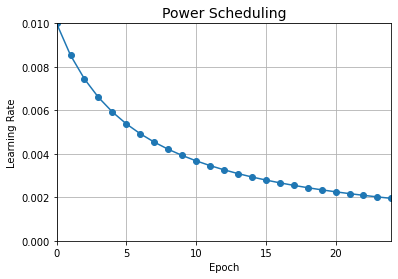

In [73]:
import math

learning_rate =0.01
decay=1e-4
batch_size=32
n_steps_per_epoch=math.ceil(len(X_train)/batch_size)
epochs=np.arange(n_epochs)
lrs=learning_rate/(1+decay*epochs*n_steps_per_epoch)

plt.plot(epochs,lrs, 'o-')
plt.axis([0, n_epochs -1, 0, 0.01])
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Power Scheduling', fontsize=14)
plt.grid(True)

## Exponential Scheduling

$lr=lr0 \cdot 0.1^{epoch/s}$

In [74]:
def exponential_decay_fn(epoch):
    return 0.01*0.1**(epoch/20)

In [75]:
def exponential_decay(lr0,s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1 **(epoch/s)
    return exponential_decay_fn

exponential_decay_fn=exponential_decay(lr0=0.01, s=20)

In [76]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300,activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(100,activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(10,activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',
             optimizer='nadam',
             metrics=['accuracy'])
n_epochs=25

In [77]:
lr_scheduler=keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history= model.fit(X_train_scaled, y_train, epochs=n_epochs,
                   validation_data=(X_valid_scaled, y_valid),
                   callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 3s 1ms/step - loss: 0.8235 - accuracy: 0.7635 - val_loss: 0.8386 - val_accuracy: 0.7696 - lr: 0.0100
Epoch 2/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.6903 - accuracy: 0.7983 - val_loss: 0.6754 - val_accuracy: 0.7904 - lr: 0.0089
Epoch 3/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.6355 - accuracy: 0.8096 - val_loss: 0.6516 - val_accuracy: 0.7946 - lr: 0.0079
Epoch 4/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5515 - accuracy: 0.8305 - val_loss: 0.5215 - val_accuracy: 0.8436 - lr: 0.0071
Epoch 5/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4936 - accuracy: 0.8444 - val_loss: 0.5337 - val_accuracy: 0.8520 - lr: 0.0063
Epoch 6/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4446 - accuracy: 0.8596 - val_loss: 0.5463 - val_accuracy: 0.8546 - lr: 0.0056
Epoch 7/25
1719/1719 [==============================] - 2s

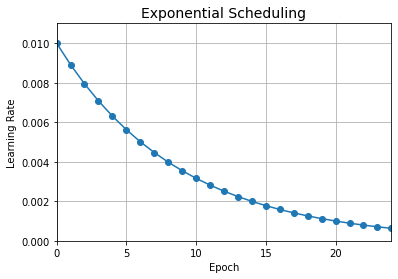

In [78]:
plt.plot(history.epoch,history.history['lr'],'o-')
plt.axis([0, n_epochs -1, 0, 0.011])
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Exponential Scheduling', fontsize=14)
plt.grid(True)

In [79]:
def exponential_decay_fn(epoch, lr):
    return lr*0.1**(1/20)

In [80]:
K =keras.backend

class ExponentialDecay(keras.callbacks.Callback):
    def __init__(self, s=40000):
        super().__init__()
        self.s=s
    
    def on_batch_begin(self, batch, logs=None):
        lr=K.get_value(self.model.optimizer.learning_rate)
        K.set_value(self.model.optimizer.learning_rate, lr*0.1**(1/self.s))
    
    def on_epoch_end(self, epoch, logs=None):
        logs=logs or {}
        logs['lr'] = K.get_value(self.model.optimizer.learning_rate)
        
model=keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(10, activation='softmax')
])

lr0=0.01
optimizer=keras.optimizers.Nadam(learning_rate=lr0)
model.compile(loss='sparse_categorical_crossentropy', optimizer = optimizer, metrics=['accuracy'])
n_epochs=25

s= 20*len(X_train)//32
exp_decay=ExponentialDecay(s)
history=model.fit(X_train_scaled, y_train, epochs=n_epochs,
                 validation_data=(X_valid_scaled, y_valid), 
                 callbacks=[exp_decay])

Epoch 1/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.8047 - accuracy: 0.7669 - val_loss: 0.7556 - val_accuracy: 0.7318 - lr: 0.0089
Epoch 2/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6529 - accuracy: 0.8020 - val_loss: 0.6254 - val_accuracy: 0.8270 - lr: 0.0079
Epoch 3/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5650 - accuracy: 0.8241 - val_loss: 0.7338 - val_accuracy: 0.8034 - lr: 0.0071
Epoch 4/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5329 - accuracy: 0.8390 - val_loss: 0.4811 - val_accuracy: 0.8548 - lr: 0.0063
Epoch 5/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4630 - accuracy: 0.8531 - val_loss: 0.5461 - val_accuracy: 0.8476 - lr: 0.0056
Epoch 6/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4078 - accuracy: 0.8682 - val_loss: 0.4611 - val_accuracy: 0.8652 - lr: 0.0050
Epoch 7/25
1719/1719 [==============================] - 3s

In [81]:
n_steps=n_epochs*len(X_train)//32
steps=np.arange(n_steps)
lrs=lr0*0.1**(steps/s)

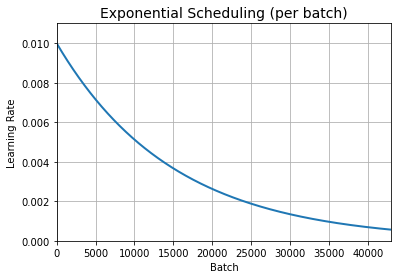

In [82]:
plt.plot(steps,lrs,'-',linewidth=2)
plt.axis([0, n_steps -1, 0, lr0*1.1])
plt.xlabel('Batch')
plt.ylabel('Learning Rate')
plt.title('Exponential Scheduling (per batch)', fontsize=14)
plt.grid(True)

## Piecewise Constant Scheduling

In [83]:
def piecewise_constant__fn(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001

In [84]:
def piecewise_constant(boundaries,values):
    boundaries= np.array([0] + boundaries)
    values = np.array(values)
    def piecewise_constant_fn(epoch):
        return values[np.argmax(boundaries > epoch) -1]
    return piecewise_constant_fn

piecewise_constant_fn=piecewise_constant([5,15],[0.01, 0.005, 0.001])

In [85]:
lr_scheduler=keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300,activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(100,activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(10,activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',
             optimizer='nadam',
             metrics=['accuracy'])
n_epochs=25

history= model.fit(X_train_scaled, y_train, epochs=n_epochs,
                   validation_data=(X_valid_scaled, y_valid),
                   callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.8385 - accuracy: 0.7582 - val_loss: 1.2867 - val_accuracy: 0.6984 - lr: 0.0100
Epoch 2/25
1719/1719 [==============================] - 3s 1ms/step - loss: 0.7873 - accuracy: 0.7707 - val_loss: 0.6102 - val_accuracy: 0.8074 - lr: 0.0100
Epoch 3/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.8302 - accuracy: 0.7614 - val_loss: 1.4091 - val_accuracy: 0.6286 - lr: 0.0100
Epoch 4/25
1719/1719 [==============================] - 3s 1ms/step - loss: 0.8570 - accuracy: 0.7605 - val_loss: 0.7889 - val_accuracy: 0.8056 - lr: 0.0100
Epoch 5/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.8797 - accuracy: 0.7564 - val_loss: 1.0440 - val_accuracy: 0.7488 - lr: 0.0100
Epoch 6/25
1719/1719 [==============================] - 3s 1ms/step - loss: 0.5261 - accuracy: 0.8473 - val_loss: 0.9034 - val_accuracy: 0.8458 - lr: 0.0050
Epoch 7/25
1719/1719 [==============================] - 3s

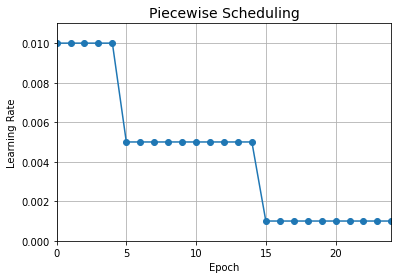

In [86]:
plt.plot(history.epoch,[piecewise_constant_fn(epoch) for epoch in history.epoch],'o-')
plt.axis([0, n_epochs -1, 0, 0.011])
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Piecewise Scheduling', fontsize=14)
plt.grid(True)

## Performance Scheduling

In [87]:
tf.random.set_seed(42)
np.random.seed(42)

In [88]:
lr_scheduler=keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300,activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(100,activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(10,activation='softmax')
])
optimizer =keras.optimizers.SGD(learning_rate=0.02, momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy',
             optimizer=optimizer,
             metrics=['accuracy'])
n_epochs=25

history= model.fit(X_train_scaled, y_train, epochs=n_epochs,
                   validation_data=(X_valid_scaled, y_valid),
                   callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5904 - accuracy: 0.8072 - val_loss: 0.5027 - val_accuracy: 0.8476 - lr: 0.0200
Epoch 2/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4989 - accuracy: 0.8396 - val_loss: 0.5883 - val_accuracy: 0.8380 - lr: 0.0200
Epoch 3/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5173 - accuracy: 0.8398 - val_loss: 0.5380 - val_accuracy: 0.8550 - lr: 0.0200
Epoch 4/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5085 - accuracy: 0.8468 - val_loss: 0.4357 - val_accuracy: 0.8622 - lr: 0.0200
Epoch 5/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5091 - accuracy: 0.8501 - val_loss: 0.6331 - val_accuracy: 0.8314 - lr: 0.0200
Epoch 6/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5119 - accuracy: 0.8516 - val_loss: 0.6458 - val_accuracy: 0.8396 - lr: 0.0200
Epoch 7/25
1719/1719 [==============================] - 2s

Text(0.5, 1.0, 'Reduce LR on Plateau')

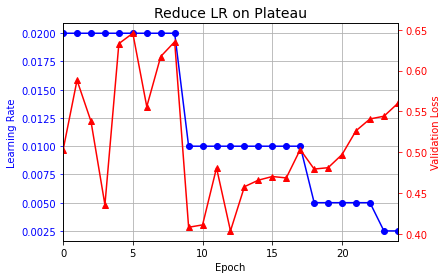

In [89]:
plt.plot(history.epoch,history.history['lr'],'bo-')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate', color ='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0,n_epochs-1)
plt.grid(True)

ax2= plt.gca().twinx()
ax2.plot(history.epoch, history.history['val_loss'], 'r^-')
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title('Reduce LR on Plateau', fontsize=14)

## tf.keras schedulers

In [90]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300,activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(100,activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(10,activation='softmax')
])
s=20*len(X_train)//32
learning_rate=keras.optimizers.schedules.ExponentialDecay(0.01, s, 0.1)
optimizer =keras.optimizers.SGD(learning_rate)
model.compile(loss='sparse_categorical_crossentropy',
             optimizer=optimizer,
             metrics=['accuracy'])
n_epochs=25

history= model.fit(X_train_scaled, y_train, epochs=n_epochs,
                   validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4893 - accuracy: 0.8276 - val_loss: 0.4093 - val_accuracy: 0.8604
Epoch 2/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3819 - accuracy: 0.8649 - val_loss: 0.3743 - val_accuracy: 0.8694
Epoch 3/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3487 - accuracy: 0.8762 - val_loss: 0.3734 - val_accuracy: 0.8690
Epoch 4/25
1719/1719 [==============================] - 2s 993us/step - loss: 0.3264 - accuracy: 0.8838 - val_loss: 0.3499 - val_accuracy: 0.8798
Epoch 5/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3105 - accuracy: 0.8896 - val_loss: 0.3435 - val_accuracy: 0.8800
Epoch 6/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2960 - accuracy: 0.8952 - val_loss: 0.3415 - val_accuracy: 0.8822
Epoch 7/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2855 - accuracy: 0.8987 - val_loss: 0.3358 - val_accurac

In [91]:
learning_rate=keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries =[5.*n_steps_per_epoch, 15.*n_steps_per_epoch],
    values=[0.01,0.005,0.001])

## 1Cycle scheduling

In [92]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor=factor
        self.rates=[]
        self.losses =[]
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs['loss'])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)
        
def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=10**-5, max_rate=10):
    init_weights=model.get_weights()
    iterations=math.ceil(len(X)/batch_size)*epochs
    factor=np.exp(np.log(max_rate/min_rate)/iterations)
    init_lr=K.get_value(model.optimizer.learning_rate)
    K.set_value(model.optimizer.learning_rate,min_rate)
    exp_lr=ExponentialLearningRate(factor)
    history=model.fit(X,y,epochs=epochs, batch_size=batch_size,callbacks=[exp_lr])
    K.set_value(model.optimizer.learning_rate, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses)
    plt.gca().set_xscale('log')
    plt.hlines(min(losses), min(rates), max(rates))
    plt.axis([min(rates), max(rates), min(losses), (losses[0]+min(losses))/2])
    plt.xlabel('Learning rate')
    plt.ylabel('Loss')


In [93]:
tf.random.set_seed(42)
np.random.seed(42)

model=keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300,activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(100,activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(10,activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',
             optimizer=keras.optimizers.SGD(learning_rate=1e-3),
             metrics=['accuracy'])

430/430 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.3878


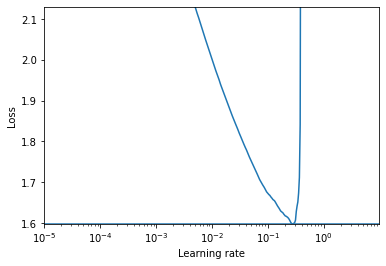

In [94]:
batch_size=128
rates, losses=find_learning_rate(model, X_train_scaled, y_train, epochs=1, batch_size=batch_size)
plot_lr_vs_loss(rates, losses)

In [95]:
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations,max_rate,start_rate=None,
                last_iterations=None, last_rate=None):
        self.iterations=iterations
        self.max_rate=max_rate
        self.start_rate=start_rate or max_rate/10
        self.last_iterations=last_iterations or iterations//10 +1
        self.half_iteration=(iterations -self.last_iterations)//2
        self.last_rate=last_rate or self.start_rate/1000
        self.iteration=0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1)*(self.iteration -iter1)/(iter2 -iter1)+rate1)
    def on_batch_begin(self, batch,logs):
        if self.iteration < self.half_iteration:
            rate=self._interpolate(0,self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration <2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration,2 *self.half_iteration, self.max_rate, self.start_rate)
        else:
            rate=self._interpolate(2*self.half_iteration, self.iterations, self.start_rate, self.last_rate)
        self.iteration +=1
        K.set_value(self.model.optimizer.learning_rate, rate)

In [96]:
n_epochs=25
onecycle=OneCycleScheduler(math.ceil(len(X_train)/batch_size)*n_epochs, max_rate=0.05)
history= model.fit(X_train_scaled, y_train, epochs =n_epochs, batch_size=batch_size,
                  validation_data =(X_valid_scaled, y_valid),
                  callbacks=[onecycle])

Epoch 1/25
430/430 [==============================] - 1s 2ms/step - loss: 0.6572 - accuracy: 0.7739 - val_loss: 0.4871 - val_accuracy: 0.8340
Epoch 2/25
430/430 [==============================] - 1s 1ms/step - loss: 0.4581 - accuracy: 0.8396 - val_loss: 0.4275 - val_accuracy: 0.8526
Epoch 3/25
430/430 [==============================] - 1s 1ms/step - loss: 0.4122 - accuracy: 0.8546 - val_loss: 0.4115 - val_accuracy: 0.8580
Epoch 4/25
430/430 [==============================] - 1s 1ms/step - loss: 0.3837 - accuracy: 0.8641 - val_loss: 0.3870 - val_accuracy: 0.8680
Epoch 5/25
430/430 [==============================] - 1s 1ms/step - loss: 0.3640 - accuracy: 0.8717 - val_loss: 0.3763 - val_accuracy: 0.8682
Epoch 6/25
430/430 [==============================] - 1s 1ms/step - loss: 0.3457 - accuracy: 0.8772 - val_loss: 0.3739 - val_accuracy: 0.8708
Epoch 7/25
430/430 [==============================] - 1s 1ms/step - loss: 0.3331 - accuracy: 0.8810 - val_loss: 0.3633 - val_accuracy: 0.8716
Epoch 

# Avoiding Overfitting Through Regualrization

## $\ell_1$ and $\ell_2$ regularization

In [97]:
layer=keras.layers.Dense(100,activation='elu',
                         kernel_initializer='he_normal',
                         kernel_regularizer=keras.regularizers.l2(0.01))

In [98]:
model=keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300,activation='elu', kernel_initializer='he_normal',kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(100,activation='elu', kernel_initializer='he_normal',kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(10,activation='softmax',kernel_regularizer=keras.regularizers.l2(0.01))
])
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='nadam',
             metrics=['accuracy'])
n_epochs =2
history=model.fit(X_train_scaled, y_train, epochs=n_epochs,validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 3s 2ms/step - loss: 1.5956 - accuracy: 0.8124 - val_loss: 0.7169 - val_accuracy: 0.8340
Epoch 2/2
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7197 - accuracy: 0.8274 - val_loss: 0.6850 - val_accuracy: 0.8376


In [99]:
from functools import partial

RegularizedDense=partial(keras.layers.Dense, activation='elu',
                        kernel_initializer='he_normal',
                        kernel_regularizer=keras.regularizers.l2(0.01))

model=keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10,activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='nadam',
             metrics=['accuracy'])
n_epochs =2
history=model.fit(X_train_scaled, y_train, epochs=n_epochs,validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 3s 2ms/step - loss: 1.6313 - accuracy: 0.8113 - val_loss: 0.7218 - val_accuracy: 0.8310
Epoch 2/2
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7187 - accuracy: 0.8273 - val_loss: 0.6826 - val_accuracy: 0.8380


## Dropout

In [100]:
model=keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300,activation='elu', kernel_initializer='he_normal'),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100,activation='elu', kernel_initializer='he_normal'),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10,activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='nadam',
             metrics=['accuracy'])
n_epochs =2
history=model.fit(X_train_scaled, y_train, epochs=n_epochs,validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5838 - accuracy: 0.7997 - val_loss: 0.3713 - val_accuracy: 0.8636
Epoch 2/2
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4212 - accuracy: 0.8447 - val_loss: 0.3400 - val_accuracy: 0.8728


## Alpha Dropout

In [102]:
tf.random.set_seed(42)
np.random.seed(42)

In [103]:
model=keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(300,activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(100,activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(10,activation='softmax')
])
optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.9,nesterov=True)
model.compile(loss='sparse_categorical_crossentropy',
             optimizer=optimizer,
             metrics=['accuracy'])
n_epochs =20
history=model.fit(X_train_scaled, y_train, epochs=n_epochs,validation_data=(X_valid_scaled, y_valid))

Epoch 1/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.6616 - accuracy: 0.7604 - val_loss: 0.5752 - val_accuracy: 0.8408
Epoch 2/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5544 - accuracy: 0.7964 - val_loss: 0.5396 - val_accuracy: 0.8460
Epoch 3/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5259 - accuracy: 0.8064 - val_loss: 0.5003 - val_accuracy: 0.8568
Epoch 4/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5050 - accuracy: 0.8126 - val_loss: 0.4778 - val_accuracy: 0.8602
Epoch 5/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4922 - accuracy: 0.8175 - val_loss: 0.4661 - val_accuracy: 0.8596
Epoch 6/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4832 - accuracy: 0.8207 - val_loss: 0.4938 - val_accuracy: 0.8566
Epoch 7/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4713 - accuracy: 0.8248 - val_loss: 0.5101 - val_accuracy:

In [104]:
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 0s 809us/step - loss: 0.4645 - accuracy: 0.8622


[0.46448007225990295, 0.8622000217437744]

In [105]:
model.evaluate(X_train_scaled, y_train)

1719/1719 [==============================] - 1s 807us/step - loss: 0.3396 - accuracy: 0.8845


[0.3396214544773102, 0.8845090866088867]

In [106]:
history=model.fit(X_train_scaled, y_train)

1719/1719 [==============================] - 2s 1ms/step - loss: 0.4185 - accuracy: 0.8448


## MC Dropout

In [107]:
tf.random.set_seed(42)
np.random.seed(42)

In [108]:
y_probas = np.stack([model(X_test_scaled, training=True) for sample in range(100)])
y_proba=y_probas.mean(axis=0)
y_std=y_probas.std(axis=0)

In [109]:
np.round(model.predict(X_test_scaled[:1]),2)

1/1 [==============================] - 0s 60ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.96]],
      dtype=float32)

In [110]:
np.round(y_probas[:,:1],2)

array([[[0.  , 0.  , 0.  , 0.  , 0.  , 0.49, 0.  , 0.14, 0.  , 0.38]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.17, 0.  , 0.8 ]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.06, 0.  , 0.32, 0.  , 0.63]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.09, 0.  , 0.34, 0.  , 0.57]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.08, 0.  , 0.33, 0.  , 0.59]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.22, 0.  , 0.55, 0.  , 0.23]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.76, 0.  , 0.14, 0.  , 0.1 ]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.28, 0.  , 0.72]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.14, 0.  , 0.84]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.07, 0.  , 0.89]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.32, 0.  , 0.09, 0.  , 0.59]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.18, 0.  , 0.  , 0.  , 0.81]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.08, 0.  , 0.23, 0.  , 0

In [111]:
np.round(y_proba[:1],2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.14, 0.  , 0.28, 0.  , 0.58]],
      dtype=float32)

In [112]:
y_std=y_probas.std(axis=0)
np.round(y_std[:1],2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.2 , 0.  , 0.24, 0.01, 0.29]],
      dtype=float32)

In [113]:
y_pred=np.argmax(y_proba, axis=1)

In [114]:
accuracy=np.sum(y_pred==y_test)/len(y_test)
accuracy

0.8711

In [115]:
class MCDropout(keras.layers.Dropout):
    def call(self, inputs):
        return super().call(inputs, training=True)
    
class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)


In [116]:
tf.random.set_seed(42)
np.random.seed(42)

In [117]:
mc_model=keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer
    for layer in model.layers
])

In [118]:
mc_model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_18 (Flatten)        (None, 784)               0         
                                                                 
 mc_alpha_dropout (MCAlphaDr  (None, 784)              0         
 opout)                                                          
                                                                 
 dense_263 (Dense)           (None, 300)               235500    
                                                                 
 mc_alpha_dropout_1 (MCAlpha  (None, 300)              0         
 Dropout)                                                        
                                                                 
 dense_264 (Dense)           (None, 100)               30100     
                                                                 
 mc_alpha_dropout_2 (MCAlpha  (None, 100)            

In [119]:
optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.9,nesterov=True)
mc_model.compile(loss='sparse_categorical_crossentropy',
             optimizer=optimizer,
             metrics=['accuracy'])

In [120]:
mc_model.set_weights(model.get_weights())

In [121]:
np.round(np.mean([mc_model.predict(X_test_scaled[:1]) for sample in range(100)], axis=0),2)

1/1 [==============================] - 0s 10ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.12, 0.  , 0.28, 0.  , 0.6 ]],
      dtype=float32)

## Max norm

In [122]:
layer = keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal',
                          kernel_constraint=keras.constraints.max_norm(1.))

In [124]:
MaxNormDense=partial(keras.layers.Dense,
                   activation='selu', kernel_initializer='lecun_normal',
                   kernel_constraint=keras.constraints.max_norm(1.))

model=keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    MaxNormDense(300),
    MaxNormDense(100),
    keras.layers.Dense(10,activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='nadam',
             metrics=['accuracy'])
n_epochs =2
history=model.fit(X_train_scaled, y_train, epochs=n_epochs,validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4744 - accuracy: 0.8330 - val_loss: 0.3853 - val_accuracy: 0.8544
Epoch 2/2
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3551 - accuracy: 0.8707 - val_loss: 0.3686 - val_accuracy: 0.8680
